# Project: Wrangling and Analyze Data

## Data Gathering

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [2]:
#Importing library
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# script to upgrade certificate on this Workspace
!pip install --upgrade certifi


    100% |████████████████████████████████| 163kB 7.6MB/s ta 0:00:01
  Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28


In [3]:
# Import the twitter_archive file into a DataFrame
df_tweet = pd.read_csv("twitter-archive-enhanced.csv")
df_tweet.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [401]:
df_tweet[df_tweet['tweet_id'] == 666020888022790149]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#download tweet image prediction data using a request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save image_predictions.tsv content to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
df_imgPredict = pd.read_csv("image_predictions.tsv" , sep="\t")
df_imgPredict.to_csv("image_predictions.csv")
df_imgPredict;

In [405]:
df_imgPredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [513]:
df_imgPredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [407]:
df_imgPredict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Open the tweet json file
file  =  open("tweet_json.txt", encoding='utf-8')
tweet_list = []
for line in file:
    tweetjson = json.loads(line)
    tweet_id = tweetjson['id']
    retweet_count = tweetjson['retweet_count']
    favorite_count = tweetjson['favorite_count']
    retweeted = tweetjson['retweeted']
     # Append to list of dictionaries
    tweet_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count),
                        'retweeted': bool(retweeted)})
 

In [6]:
# Create DataFrame from list of dictionaries
df_tweetExtra = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count','retweeted'])
df_tweetExtra.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


In [7]:
df_tweetExtra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.5 KB


## Assessing Data



In [414]:
#View random sample of the dataset
df_tweet.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None
951,751950017322246144,NaN,NaN,2016-07-10 01:23:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lola. She's a surfing pupper. 13/10 ma...,NaN,NaN,NaN,https://vine.co/v/5WrjaYAMvMO,13,10,Lola,None,None,pupper,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1553,688908934925697024,NaN,NaN,2016-01-18 02:21:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarence. He does parkour. 8/10 very tale...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688908934...,8,10,Clarence,None,None,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Apollo. He thought you weren't coming ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835...,8,10,Apollo,None,None,None,None


In [35]:
# checking for incorrect rating value in the data set
df_tweet[df_tweet['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [415]:
# 59 null values in the expanded_url columns signifies tweets without images. Will only need tweet with images
df_tweet.expanded_urls.isna().sum()

59

In [416]:
# checking for multiple values in the expanded_urls column
df_tweet.expanded_urls[18]

'https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1'

In [44]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [417]:
#Checking the data in df_tweetExtra to see the structure
df_tweetExtra.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


In [13]:
df_tweetExtra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [517]:
tw2 = df_imgPredict['tweet_id']
tw1 = df_tweet['tweet_id']

### Quality issues
#### twitter-archive-enhanced

1. Tweet id 835246439529840000 has an invalid rating ( numerator and denominator)

2. Timestamp column should be a datetime data type not an object data type in the Twitter-archive-enhanced table

2. Expanded_url contain a missing image url value. We only want tweet with image

4. Missing values in in_reply_to_status_id and in_reply_to_user_id

5. Expanded_urls contain repeated values in some rows

6. Not null values in retweeted_status_user_id  and retweeted_status_id

7. Missing values in retweeted_status_timestamp, retweeted_status_id and retweeted_status_user_id

8. Rating value missing in the data set

#### Image_prediction

9. There should be only one image prediction confidence value, prediction for the image, breed of Dog in the in Image_prediction table




### Tidiness issues
#### Twitter-archive-enhanced

1. Text column in Twitter-archive-enhanced contain short url data and should be separated to URL and text




#### Image_predictions
2. Image_prediction and the value extracted form the tweet_json text should be part of the Twitter-archive-enhance table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [8]:
# Make copies of original pieces of data
df_tweet_clean = df_tweet.copy()
df_imgPredict_clean = df_imgPredict.copy()
df_tweetExtra_clean = df_tweetExtra.copy()

### Issue #1: 
#### Tweet id 835246439529840000 has an invalid rating ( numerator and denominator)

#### Define:

Replace the denominator and numerator with the appropriate value from the the tweet text. This was invalid and 13/10 was the valide rating.

#### Code

In [9]:
# Checking the incorrect rating value in the data set
tweet_text = df_tweet_clean[df_tweet_clean['tweet_id'] == 835246439529840640 ]['text'].values[0]
tweet_text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [10]:
# Using a mask to change the rating value to the correct number
mask = df_tweet_clean.tweet_id == 835246439529840640
num_column = 'rating_numerator'
den_column = 'rating_denominator'

In [11]:
df_tweet_clean.loc[mask,num_column] = 13
df_tweet_clean.loc[mask,den_column] = 10


#### Test

In [12]:
# Check if rating has been updated
df_tweet_clean[df_tweet_clean['tweet_id'] == 835246439529840640 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


### Issue #2:

#### Timestamp column should be a datetime data type not an object data type in the  `Twitter-archive-enhanced` table

#### Define
Convert the timestamp data type from object to a datetime64 data type using to_datetime function.

#### Code

In [13]:
# covert timestamp column to a datetime64[ns] data tyep
df_tweet_clean['timestamp'] = pd.to_datetime(df_tweet_clean['timestamp'])

#### Test

In [14]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #3:

#### Expanded_url contain a missing image url value. We only want tweet with image.

#### Define
Drop rows with empty expanded url using dropna on the expanded_url column,this will remove the null(empty) values in the expanded url column in the twitter_archive data. droping null values from the expanded column will give us tweets with images only.

#### Code

In [15]:
# Drop null values from the url
df_tweet_clean = df_tweet_clean.dropna(subset=['expanded_urls'])

#### Test

In [16]:
# checki if there is still a null value in the url
df_tweet_clean.expanded_urls.isna().sum()

0

In [431]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2297 non-null int64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 287.1+ KB


### Issue #4:

#### Missing values in in_reply_to_status_id and in_reply_to_user_id

#### Define
Drop missing values using the drop function in pandas. They will not be needed for analysis.

#### Code

In [17]:
# Remove column name 'in_reply_to_status_id' and 'in_reply_to_user_id'
df_tweet_clean = df_tweet_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [18]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2297 non-null int64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 287.1+ KB


### Issue #5:

#### Expanded_urls contain repeated values in some rows

#### Define
Extract the first url with "https://twitter.com" prefix using a function. This way the expanded url will contain only one value which is the tweeted text only

In [19]:
#Checking for let before clearning
len(df_tweet_clean['expanded_urls'])

2297

In [20]:
# Verifying the inconsistency
url = df_tweet_clean['expanded_urls'].str.split(",", n = 1, expand = False)
url[6]

['https://gofundme.com/ydvmve-surgery-for-jax',
 'https://twitter.com/dog_rates/status/890971913173991426/photo/1']

#### Code

In [21]:
#Copy the  df_tweet_clean['expanded_urls'] data series to urls
urls = df_tweet_clean['expanded_urls']
url_st =[]
#Function to extract the first match url with prefix "https://twitter.com"
def url_parser(urls):
    # loop through all the urls
    for url in urls:
        count = 0
        temp_url = url.split(",")
        # loop through each text in the the urls row
        for text in temp_url:
            count += 1
            # find the first url with  "https://twitter.com" prefix 
            if text.find("https://twitter.com") >= 0:  
                # apped the text with the prefix url "https://twitter.com"  and break the loop
                url_st.append(text) 
                break
            # append the defaul url when the is no url with https://twitter.com"
            if count == len(temp_url):
                url_st.append(text) 
                
    # return result       
    return url_st 

In [22]:
# call the function to create  new url with no multiple urls
url_st = url_parser(urls)

In [23]:
# replace the  expanded_urls with new values
df_tweet_clean['expanded_urls'] = url_st 

#### Test

In [24]:
#Before Modification
df_tweet['expanded_urls'][18]

'https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1'

In [25]:
#Before Modification
df_tweet_clean['expanded_urls'][18]

'https://twitter.com/dog_rates/status/888554962724278272/photo/1'

### Issue #6:

#### Not null values in retweeted_status_user_id and retweeted_status_id

#### Define
Drop not null value of the retweeted_status_user_id and  retweeted_status_id using pandas query. This way only original tweet will remain and not retweet in WeRateDogs.

#### Code

In [26]:
#get only tweet and not retweet by filtering for retweeted_status_user_id
df_tweet_clean = df_tweet_clean[df_tweet_clean['retweeted_status_user_id'].isnull()]

#### Test

In [27]:
# retweeted_status_user_id value should be null indicates original tweet
df_tweet_clean['retweeted_status_user_id'].isnull().sum()

2117

In [28]:
df_tweet_clean

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #7:

#### Missing values in retweeted_status_timestamp, retweeted_status_id and retweeted_status_user_id

#### Define
Drop all four columns: retweeted_status_timestamp, retweeted_status_id, retweeted_status_user_id and source. They will be use in the analysis

#### Code

In [29]:
# Remove column name 'in_reply_to_status_id' and 'in_reply_to_user_id'
df_tweet_clean = df_tweet_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','source'], axis=1)

#### Test

In [30]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 198.5+ KB


### Issue #8:

#### Rating value missing in the data set.

#### Define
Add a rating column by dividing the numerator by the denominator and drop the both numerator and denominator column

#### Code

In [31]:
# the float value of the rating
df_tweet_clean['dog_rating'] =  df_tweet_clean['rating_numerator'] / df_tweet_clean['rating_denominator']

In [32]:
# Remove column name 'rating_numerator' and 'rating_denominator'
df_tweet_clean = df_tweet_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [33]:
df_tweet_clean['dog_rating'].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: dog_rating, dtype: float64

In [34]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id         2117 non-null int64
timestamp        2117 non-null datetime64[ns]
text             2117 non-null object
expanded_urls    2117 non-null object
name             2117 non-null object
doggo            2117 non-null object
floofer          2117 non-null object
pupper           2117 non-null object
puppo            2117 non-null object
dog_rating       2117 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 181.9+ KB


In [ ]:
df_tweet_clean

### Issue #9:

#### There should be only one image prediction confidence value, prediction for the image, breed of Dog in the in Image nunmber

#### Define
Drop p2,p2_conf,p2_dog, p3, p3_conf, p3_dog using the drop function in pandas

#### Code

In [35]:
# drop columns not need in the analysis
df_imgPredict_clean = df_imgPredict_clean.drop(['p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog', 'img_num'], axis=1)

#### Test

In [36]:
df_imgPredict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 66.9+ KB


### Tidiness issues








### Issue #1:

#### Text column in `Twitter-archive-enhanced` contain short url data and should be separated to URL and text

#### Define
Extract the url  from the text column using regular expressions and pandas' str.extract method and let the url stays on it own column and text on it's own column. This way, we don't have thetext and the short url together.

#### Code

In [37]:
# use a regular expression to extract the url from the text and a new column
df_tweet_clean['short_url'] = df_tweet_clean.text.str.extract('(https:\/\/?[\w/\-?=%.]+\.[\w/\-&?=%.]+)', expand=True)

In [38]:
#Get the original text with the url
alltext = df_tweet_clean['text']
textonly = []

In [39]:
# loop through the url and split with http
for line in alltext:
    text = line.split("http")
    # append the first part of the text and get the text only
    for tweet in text:
        textonly.append(tweet)
        break

In [40]:
# replace df_tweet_clean['text']  with the text portion only
df_tweet_clean['text'] = textonly

#### Test

In [41]:
#check the text in df_tweet_clean
df_tweet_clean['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

### Issue #2:
####  `Image_prediction`  and the value extracted from the  `tweet_json` should be part of the `Twitter-archive-enhance` table.

#### Define
Merge the Twitter-archive-enhance table to the tweet_json table and Image_prediction joining on given tweet_id.

#### Code

In [42]:
# create a copy of the clearn text called df_tweet_clean_master
df_tweet_clean_master = df_tweet_clean.copy()

In [43]:
# medge the df_tweet_clean_master with the df_imgPredict_clean data
df_tweet_clean_master = pd.merge(df_tweet_clean_master, df_imgPredict_clean,
                            on=[ 'tweet_id'], how='left')

In [44]:
# medge the df_tweet_clean_master with the df_tweetExtra_clean data
df_tweet_clean_master = pd.merge(df_tweet_clean_master, df_tweetExtra_clean,
                            on=[ 'tweet_id'], how='left')

#### Test

In [46]:
df_tweet_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 18 columns):
tweet_id          2117 non-null int64
timestamp         2117 non-null datetime64[ns]
text              2117 non-null object
expanded_urls     2117 non-null object
name              2117 non-null object
doggo             2117 non-null object
floofer           2117 non-null object
pupper            2117 non-null object
puppo             2117 non-null object
dog_rating        2117 non-null float64
short_url         2117 non-null object
jpg_url           1994 non-null object
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null object
retweet_count     2117 non-null int64
favorite_count    2117 non-null int64
retweeted         2117 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(11)
memory usage: 299.8+ KB


#### You do not need to gather the tweets beyond August 1st, 2017

In [47]:
# As part of the requirement
df_tweet_clean_master = df_tweet_clean_master[df_tweet_clean_master['timestamp'] <'2017-08-01' ]


In [48]:
df_tweet_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 2 to 2116
Data columns (total 18 columns):
tweet_id          2115 non-null int64
timestamp         2115 non-null datetime64[ns]
text              2115 non-null object
expanded_urls     2115 non-null object
name              2115 non-null object
doggo             2115 non-null object
floofer           2115 non-null object
pupper            2115 non-null object
puppo             2115 non-null object
dog_rating        2115 non-null float64
short_url         2115 non-null object
jpg_url           1992 non-null object
p1                1992 non-null object
p1_conf           1992 non-null float64
p1_dog            1992 non-null object
retweet_count     2115 non-null int64
favorite_count    2115 non-null int64
retweeted         2115 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(11)
memory usage: 299.5+ KB


#### Drop null data from df_tweet_clean_master
This will make the date clean, although could be clean further before analysis.

In [49]:
df_tweet_clean_master = df_tweet_clean_master.dropna()
df_tweet_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 2 to 2116
Data columns (total 18 columns):
tweet_id          1992 non-null int64
timestamp         1992 non-null datetime64[ns]
text              1992 non-null object
expanded_urls     1992 non-null object
name              1992 non-null object
doggo             1992 non-null object
floofer           1992 non-null object
pupper            1992 non-null object
puppo             1992 non-null object
dog_rating        1992 non-null float64
short_url         1992 non-null object
jpg_url           1992 non-null object
p1                1992 non-null object
p1_conf           1992 non-null float64
p1_dog            1992 non-null object
retweet_count     1992 non-null int64
favorite_count    1992 non-null int64
retweeted         1992 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(11)
memory usage: 282.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
# Store the df_tweet_clean_master data in csv
df_tweet_clean_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Assessing the stored data using pandas

In [3]:
#Read the stored twitter_archive_master data.
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head(3)

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_rating,short_url,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,retweeted
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,4328,25461,False
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,8964,42908,False
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2,https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774,41048,False


#### Assess

Not needed columns: doggo,floofer,pupper, and puppo in the data set.

#### Define
Drop four columns: doggo,floofer,pupper, and puppo using pandas drop function(). They will not be needed for this analysis and would be dropped to have a cleaner data.

#### Code

In [4]:
# drop the columns
twitter_archive_master = twitter_archive_master.drop(['doggo','floofer','pupper', 'puppo'], axis=1)

#### Text

In [5]:
# check to see the drop function works
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 14 columns):
tweet_id          1992 non-null int64
timestamp         1992 non-null object
text              1992 non-null object
expanded_urls     1992 non-null object
name              1992 non-null object
dog_rating        1992 non-null float64
short_url         1992 non-null object
jpg_url           1992 non-null object
p1                1992 non-null object
p1_conf           1992 non-null float64
p1_dog            1992 non-null bool
retweet_count     1992 non-null int64
favorite_count    1992 non-null int64
retweeted         1992 non-null bool
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 190.7+ KB


In [9]:
# view the first 3 data
twitter_archive_master.head(4)

,tweet_id,timestamp,text,expanded_urls,name,dog_rating,short_url,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,retweeted
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,4328,25461,False
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,8964,42908,False
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774,41048,False
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,https://t.co/kQ04fDDRmh,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,3261,20562,False


#### Analyzing for produce insight

In [104]:
# describe the value columns in the twitter_archive_master data set
twitter_archive_master.describe()

,tweet_id,dog_rating,p1_conf,retweet_count,favorite_count
count,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000
mean,7.356937e+17,1.169118,0.594326,2761.816767,8867.866968
std,6.732952e+16,4.069111,0.271795,4674.299433,12187.277998
min,6.660209e+17,0.000000,0.044333,16.000000,81.000000
25%,6.758399e+17,1.000000,0.363174,623.750000,1978.500000
50%,7.084132e+17,1.100000,0.587797,1354.500000,4130.500000
75%,7.874779e+17,1.200000,0.846718,3220.000000,11278.750000
max,8.918152e+17,177.600000,1.000000,79515.000000,132810.000000


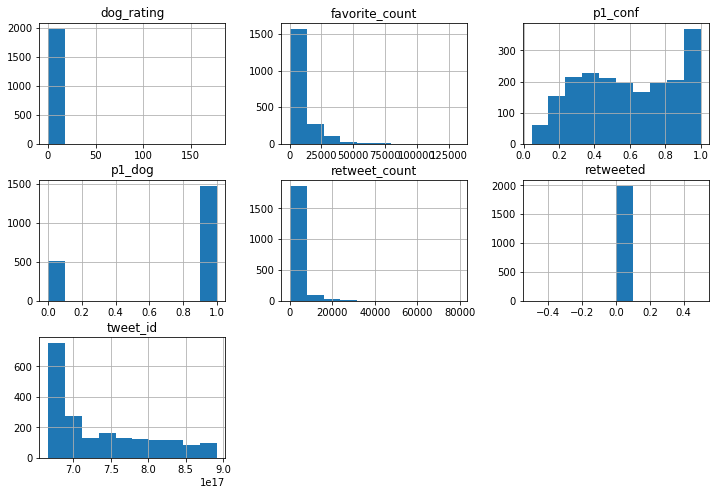

In [106]:
#Check the histogram plot of the numeric column using the hist() function
twitter_archive_master.hist(figsize= (12,8));

### Insights 1:

#### What relationship exist between the  favorite countand the  retweeted count

Looking at the the pandas query, it clear that there is relationship between retweet count and favorite count columns in the twitter_archive_master data. The highest retweeted count has the highest favorite count



In [6]:
#Check the favorite_count with the maximum retweet_count
twitter_archive_master[twitter_archive_master['retweet_count'] == twitter_archive_master['retweet_count'].max()]

,tweet_id,timestamp,text,expanded_urls,name,dog_rating,short_url,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,retweeted
773,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,1.3,https://t.co/7wE9LTEXC4,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,True,79515,131075,False


In [7]:
#Check the favorite_count with the maximum retweet_count
twitter_archive_master[twitter_archive_master['retweet_count'] == twitter_archive_master['retweet_count'].min()]

,tweet_id,timestamp,text,expanded_urls,name,dog_rating,short_url,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,retweeted
1975,666102155909144576,2015-11-16 03:55:04,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,None,1.1,https://t.co/11LvqN4WLq,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,English_setter,0.298617,True,16,81,False


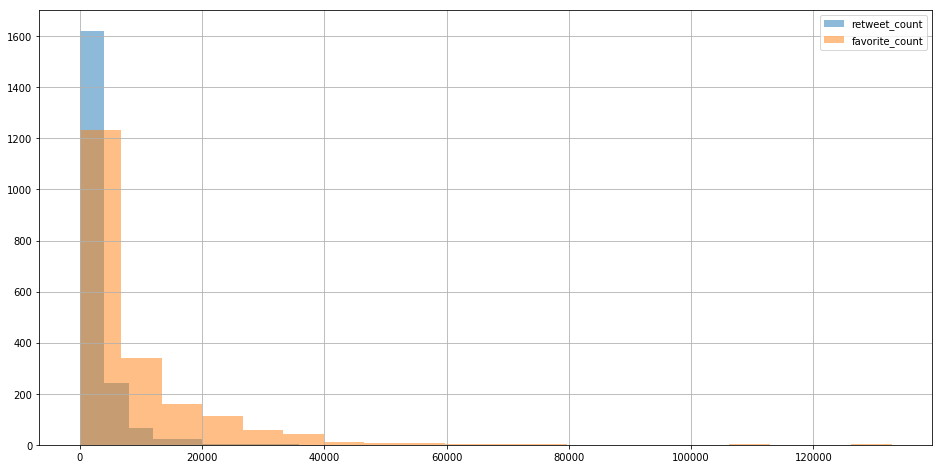

In [108]:
# visualising the relatioship using hist
twitter_archive_master.retweet_count.hist(alpha=0.5, bins=20, figsize=(16,8), label='retweet_count')
twitter_archive_master.favorite_count.hist(alpha=0.5, bins=20, figsize=(16,8), label='favorite_count')
plt.legend();

### Insights 2:

####  Which dog prediction is mostly predicted in the data set. 

Taking a count of dog predition, We have more golden retriver preditions in the data set


In [109]:
# checking for the highest dog prediction using value count
twitter_archive_master.p1.value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Cardigan                      17
beagle                        17
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              16
kuvasz                        16
Italian_greyhound             16
web_site                      15
          

### Insights 3:

#### Which overall dog predictions has the highest rating in the data set. 

Grouping the data by dog prediction p1 and summing the dog_rating value, Chihuahua has the highest value. This shows that most predictions has the highest rating for dogs. traffic_light has raing of  0.0 and Chihuahua a rating sum of 83.3


In [110]:
#using groupby function to group the predicted dog names and get the sum of their rating
twitter_archive_master.groupby('p1')['dog_rating'].sum()

p1
Afghan_hound                       2.9
African_crocodile                  1.0
African_grey                       1.1
African_hunting_dog                0.8
Airedale                          11.8
American_Staffordshire_terrier    14.3
American_black_bear                0.8
Angora                             1.4
Appenzeller                        2.2
Arabian_camel                      2.0
Arctic_fox                         4.2
Australian_terrier                 2.3
Bedlington_terrier                 5.0
Bernese_mountain_dog              11.2
Blenheim_spaniel                  11.1
Border_collie                     12.7
Border_terrier                     8.5
Boston_bull                        8.5
Brabancon_griffon                  3.0
Brittany_spaniel                   7.3
Cardigan                          19.6
Chesapeake_Bay_retriever          24.8
Chihuahua                         83.3
Christmas_stocking                 3.1
Dandie_Dinmont                     6.4
Doberman              

### Insights 4:


#### The percentage of correct dog prediction in the data set. 

Another insight one can check is the percentage of correct dog prediction. To find this we'll want to look at the number of predictions that are true for dog, divided by the total numbers of all predictions.


In [70]:
# Number of true dog prediction (numerator)
dog_counts = twitter_archive_master.p1_dog.value_counts()[True]
dog_counts

1476

In [78]:
# Number of all prediction (denumerator)
all_prediction_count  = twitter_archive_master.p1_dog.value_counts().sum()
all_prediction_count

1992

In [114]:
# The percentage of correct dog prediction in the data set
dogper = dog_counts / all_prediction_count * 100
dogper

74.096385542168676

In [119]:
# The percentage of non  dog prediction in the data set
nondogper = 100 - dogper
nondogper

25.903614457831324

The results show us that 74% of dog prediction are true for dogs

### Visualization

### 1. Visualizing the percentage portion in  of correct dog prediction in the data set using pie chart

In [120]:
# Number of 'p1_dog'  (numerator)
No_dog_prediction = twitter_archive_master.p1_dog.value_counts()[True]
dog_prediction =  twitter_archive_master.p1_dog.value_counts()[False]

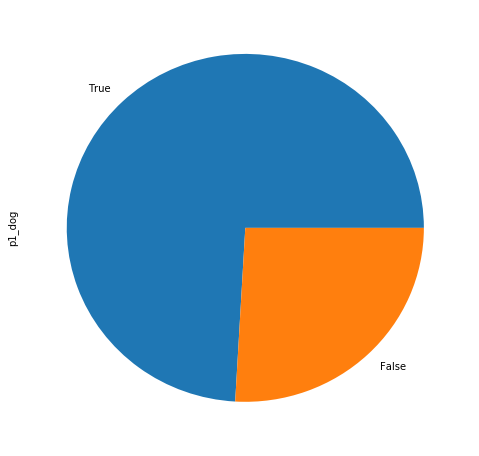

In [121]:
# Using pie plot to see the area of the plot apportion to the predicted dog percentage
labels = np.full(len(twitter_archive_master.p1_dog.value_counts()), "False", dtype=object)
labels[0] = True
twitter_archive_master.p1_dog.value_counts().plot(kind="pie",  labels=labels, figsize=(8,8))

The blue portion of the pie chart represent the percentage of true dog predictions amd the orange for false predictions.

### 2. Visualizing the relationship between retweet count and favourite count using scatter plot

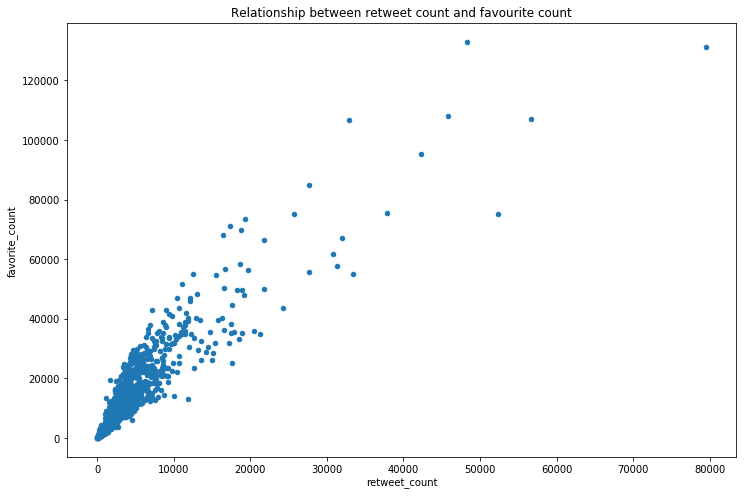

In [122]:
# plotting a scatter plot to visualize relationship between retweet count and favourite count
twitter_archive_master.plot(x='retweet_count', y= 'favorite_count', kind = 'scatter',  
title='Relationship between retweet count and favourite count',figsize= (12,8));

We can conclude that there is correlation between  `retweet_count` and `favourite_count` in the data set